In [1]:
from datasets import load_from_disk
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
data = load_from_disk("../data/predicted-data")

In [3]:
preds = data["pred"].argmax(dim=-1).cpu().numpy()
lens = np.asarray([len(content) for content in data["processed_func"]])
labels = data["true"].cpu().numpy()
correct = labels == preds

In [4]:
filtered_correct = correct[lens < 10_000]
filtered_lens = lens[lens < 10_000]
filtered_preds = preds[lens < 10_000]
filtered_labels = labels[lens < 10_000]

C:\Users\I518118\AppData\Local\Temp\ipykernel_14636\2755590405.py:13: RuntimeWarning: invalid value encountered in divide
  tpr_binned = tp_binned / (tp_binned + fn_binned)


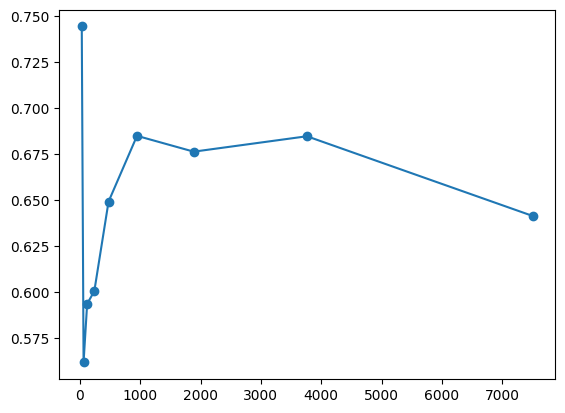

In [5]:
_, xedges = np.histogram(filtered_lens, bins=[0] + np.logspace(np.log10(20), np.log10(10_000), 10).tolist())

filtered_tps = filtered_lens[(filtered_preds == 1) & filtered_correct]
filtered_tns = filtered_lens[(filtered_preds == 0) & filtered_correct]
filtered_fps = filtered_lens[(filtered_preds == 1) & ~filtered_correct]
filtered_fns = filtered_lens[(filtered_preds == 0) & ~filtered_correct]

tp_binned = np.histogram(filtered_tps, bins=xedges)[0]
tn_binned = np.histogram(filtered_tns, bins=xedges)[0]
fp_binned = np.histogram(filtered_fps, bins=xedges)[0]
fn_binned = np.histogram(filtered_fns, bins=xedges)[0]

tpr_binned = tp_binned / (tp_binned + fn_binned)
tnr_binned = tn_binned / (tn_binned + fp_binned)

bacc_binned = (tpr_binned + tnr_binned) / 2

xvals = (xedges[1:] + xedges[:-1])/2
plt.plot(xvals, bacc_binned, marker="o")

In [35]:
tokenizer.decode(tokenized_data[0]["input_ids"])

'<s>smb_ofile_delete ( void * arg ) { smb_tree_t * tree ; smb_ofile_t * of = ( smb_ofile_t * ) arg ; SMB_OFILE_VALID ( of ) ; ASSERT ( of -> f_refcnt == 0 ) ; ASSERT ( of -> f_state == SMB_OFILE_STATE_CLOSED ) ; ASSERT (! SMB_OFILE_OPLOCK_GRANTED ( of ) ) ; tree = of -> f_tree ; smb_llist_enter ( & tree -> t_ofile_list, RW_WRITER ) ; smb_llist_remove ( & tree -> t_ofile_list, of ) ; smb_idpool_free ( & tree -> t_fid_pool, of -> f_fid ) ; atomic_dec_32 ( & tree -> t_session -> s_file_cnt ) ; smb_llist_exit ( & tree -> t_ofile_list ) ; mutex_enter ( & of -> f_mutex ) ; mutex_exit ( & of -> f_mutex ) ; switch ( of -> f_ftype ) { case SMB_FTYPE_BYTE_PIPE : case SMB_FTYPE_MESG_PIPE : smb_opipe_dealloc ( of -> f_pipe ) ; of -> f_pipe = NULL ; break ; case SMB_FTYPE_DISK : if ( of -> f_odir!= NULL ) smb_odir_release ( of -> f_odir ) ; smb_node_rem_ofile ( of -> f_node, of ) ; smb_node_release ( of -> f_node ) ; break ; default : ASSERT (! " f _ ftype " ) ; break ; } of -> f_magic = ( uint32_t